# FPL 18 Figures

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

from net import VGG16, RESNET50, MOBILENET_V1, MOBILENET_V2

In [3]:
matplotlib.rcParams.update({'font.size': 14})

## Characterisation of Four Example Networks

In [4]:
net_stat = pd.read_csv('data/net_stat.csv')
net_stat

,Model Name,# Block Params,# Conv Params,# FC Params,# Block Ops,# Conv Ops,# FC Ops,# Total Params,# Total Ops
0,ResNet-50,23400000.0,9410.0,2050000.0,7.480000e+09,238000000.0,4100000.0,25500000.0,7.720000e+09
1,MobileNetV1,3180000.0,864.0,1024000.0,1.110000e+09,21900000.0,2048000.0,4210000.0,1.140000e+09
2,MobileNetV2,1780000.0,410464.0,1280000.0,5.460000e+08,62010800.0,2560000.0,3470000.0,6.110000e+08


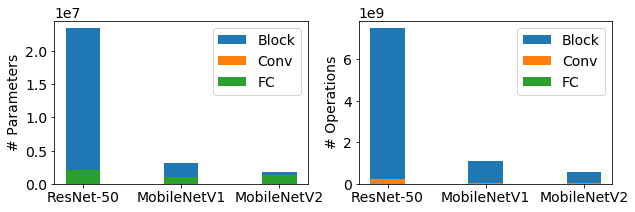

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

ind = np.arange(len(net_stat.index))
width = 0.35

ax[0].bar(ind, net_stat['# Block Params'].tolist(), width, label='Block')
ax[0].bar(ind, net_stat['# Conv Params'].tolist(), width, label='Conv')
ax[0].bar(ind, net_stat['# FC Params'].tolist(), width, label='FC')

ax[0].set_xticks(ind)
ax[0].set_xticklabels(tuple(net_stat['Model Name'].tolist()))
ax[0].set_ylabel('# Parameters')
ax[0].legend()

ax[1].bar(ind, net_stat['# Block Ops'].tolist(), width, label='Block')
ax[1].bar(ind, net_stat['# Conv Ops'].tolist(), width, label='Conv')
ax[1].bar(ind, net_stat['# FC Ops'].tolist(), width, label='FC')

ax[1].set_xticks(ind)
ax[1].set_xticklabels(tuple(net_stat['Model Name'].tolist()))
ax[1].set_ylabel('# Operations')
ax[1].legend()

fig.savefig('net_stat.pdf', bbox_inches='tight')

## VGG-16 Layer Replacement

In [8]:
vgg16_replace = pd.read_csv('data/vgg16_replace.csv')
vgg16_dist = pd.read_csv('data/vgg16_dist.csv')

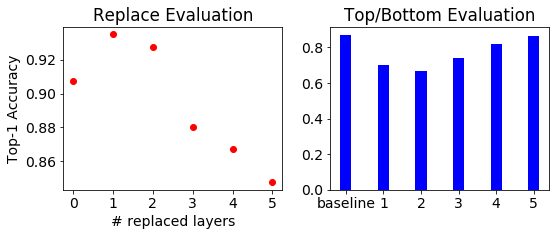

In [29]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 3.5))

ind = np.arange(len(vgg16_replace.index))
ax[0].plot(ind, vgg16_replace['accuracy'].tolist(), 'o', color='r')
ax[0].set_xticks(ind)
ax[0].set_xlabel('# replaced layers')
ax[0].set_ylabel('Top-1 Accuracy')
ax[0].set_title('Replace Evaluation')
# ax[0].set_xticklabels(vgg16_replace['replaced_layers'])

width = 0.3
ind = np.arange(len(vgg16_dist.index))
ax[1].bar(ind, vgg16_dist['accuracy'].tolist(), width, color='b')
ax[1].set_xticks(ind)
ax[1].set_xticklabels(vgg16_dist['group_id'].tolist())
ax[1].set_title('Top/Bottom Evaluation')

fig.tight_layout()
fig.savefig('vgg16_eval.pdf')

## End-to-End Framework Evaluation

In [59]:
end2end = pd.read_csv('end2end.csv')
end2end

,model_name,accuracy,performance,latency,size
0,VGG-16,0.9075,734.40,21.30,138.34
1,VGG-16 (1),0.9350,1538.20,17.10,132.10
2,VGG-16 (2),0.9275,1561.53,12.40,126.80
3,VGG-16 (5),0.8475,433.30,8.81,125.30
4,ResNet-50,0.9350,838.30,8.06,24.30
5,MobileNetV1,0.8825,211.30,5.38,4.21
6,MobileNetV2,0.8750,111.20,5.49,3.47


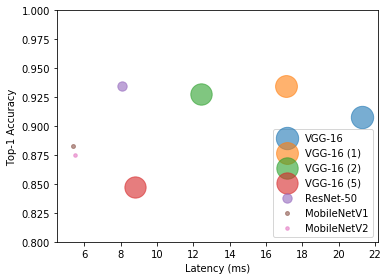

In [60]:
fig, ax = plt.subplots(figsize=(5.5, 4))

for i in range(len(end2end.index)):
    ax.scatter(end2end['latency'].tolist()[i], end2end['accuracy'].tolist()[i],
               s=500 * end2end['size'].tolist()[i] / end2end['size'].tolist()[0],
               alpha=0.6,
               label=end2end['model_name'].tolist()[i])
    
ax.set_xlabel('Latency (ms)')
ax.set_ylabel('Top-1 Accuracy')
ax.set_ylim([0.8, 1.0])
ax.legend()

fig.tight_layout()
fig.savefig('end2end.pdf')

## Eval performance

In [13]:
perf = pd.read_csv('data/eval.csv')
perf

,Unnamed: 0,VGG-16,VGG-16 (OPT),ResNet-50,MobileNet V1,MobileNet V2
0,# Operations (GOP),30.95,26.29,7.74,1.14,0.611
1,# Parameters (M),138.3,132.1,25.5,4.21,3.47
2,Clock freq.,200,200,200,200,200
3,Precision (fixed),16 bit,16 bit,16 bit,16 bit,16 bit
4,DSP (18 x 18),1152 (58.7%),1664 (84.8%),1680 (85.6%),1664 (84.8%),1856 (94.5%)
5,Logic (ALM),200.2 K (76.3%),235.1 K (89.6%),244.6 K (93.2%),222.3 K (84.7%),212.6 K (81.0%)
6,BRAM (M20K),1876 (73.1%),1923 (74.9%),2061 (80.3 %),1651 (64.3%),1420 (55.3%)
7,Latency / Image (ms),21.3,17.1,9.97,0.884,1.02
8,Throughput (GOPs),1310.9,1538.2,774.37,1287.2,592


In [15]:
print(perf.to_latex())

\begin{tabular}{lllllll}
\toprule
{} &            Unnamed: 0 &           VGG-16 &     VGG-16 (OPT) &        ResNet-50 &     MobileNet V1 &     MobileNet V2 \\
\midrule
0 &    \# Operations (GOP) &            30.95 &            26.29 &             7.74 &             1.14 &            0.611 \\
1 &      \# Parameters (M) &            138.3 &            132.1 &             25.5 &             4.21 &             3.47 \\
2 &           Clock freq. &              200 &              200 &              200 &              200 &              200 \\
3 &     Precision (fixed) &           16 bit &           16 bit &           16 bit &           16 bit &           16 bit \\
4 &         DSP (18 x 18) &     1152 (58.7\%) &     1664 (84.8\%) &     1680 (85.6\%) &     1664 (84.8\%) &     1856 (94.5\%) \\
5 &           Logic (ALM) &  200.2 K (76.3\%) &  235.1 K (89.6\%) &  244.6 K (93.2\%) &  222.3 K (84.7\%) &  212.6 K (81.0\%) \\
6 &           BRAM (M20K) &     1876 (73.1\%) &     1923 (74.9\%) &    2061 

## Fuse and not fuse

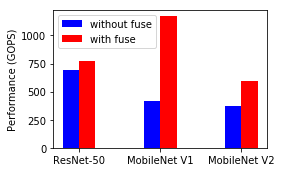

In [30]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ind = np.arange(3)
width = 0.2
names = ['ResNet-50', 'MobileNet V1', 'MobileNet V2']

with_fuse = [774.37, 1168.87, 591.99]
without_fuse = [691.8, 420.3, 369.2]

ax.bar(ind, without_fuse, width, label='without fuse', color='b')
ax.bar(ind + width, with_fuse, width, label='with fuse', color='r')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(names)
ax.set_ylabel('Performance (GOPS)')
ax.legend()

fig.tight_layout()
fig.savefig('fuse_and_not_fuse.pdf')

## Joint

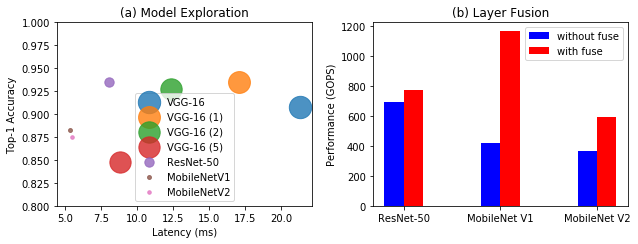

In [63]:
fig, ax = plt.subplots(ncols=2, figsize=(9, 3.5))

for i in range(len(end2end.index)):
    ax[0].scatter(end2end['latency'].tolist()[i], end2end['accuracy'].tolist()[i],
               s=500 * end2end['size'].tolist()[i] / end2end['size'].tolist()[0],
               alpha=0.8,
               label=end2end['model_name'].tolist()[i])

ax[0].set_title('(a) Model Exploration')
ax[0].set_xlabel('Latency (ms)')
ax[0].set_ylabel('Top-1 Accuracy')
ax[0].set_ylim([0.80, 1.0])
ax[0].legend()

ind = np.arange(3)
width = 0.2
names = ['ResNet-50', 'MobileNet V1', 'MobileNet V2']

with_fuse = [774.37, 1168.87, 591.99]
without_fuse = [691.8, 420.3, 369.2]

ax[1].set_title('(b) Layer Fusion')
ax[1].bar(ind, without_fuse, width, label='without fuse', color='b')
ax[1].bar(ind + width, with_fuse, width, label='with fuse', color='r')
ax[1].set_xticks(ind + width / 2)
ax[1].set_xticklabels(names)
ax[1].set_ylabel('Performance (GOPS)')
ax[1].legend()

fig.tight_layout()
fig.savefig('join.pdf')